# CMSE 381 Final Project Template

**INSTRUCTIONS**: This is a template to help organize your project.  All projects should include the 5 major sections below (you do not need to use this template file).  If you use this file, complete your work below and remove content in parentheses. Also, remove this current cell.  

#### CMSE 381 Final Project
### &#9989; Group members: Mehrshad, Rithvik
### &#9989; Section_002
#### &#9989; 11/29/25

# ___PROJECT TITLE HERE___

## Background and Motivation

_(Provide context for the problem.  **Clearly state the question(s) you set
out to answer.**)_

## Methodology
_(How did you go about answering your question(s)? You should wrote some code here to demonstrate what the data is like and how in principle your method works. You can leave the variations of the related to specific results to the results section.)_

In [23]:
# ------------------------------------------------
# Import modules and find all CSV files
# ------------------------------------------------

import pandas as pd
import numpy as np
import glob
import os

# Path to folder containing the 193 CSV files
data_path = "Freiwald_Tsao_faceviews_AM_data_csv"

# list of all CSV files in that folder
csv_files = glob.glob(os.path.join(data_path, "*.csv"))

print("Number of CSV files found:", len(csv_files))
print("First 5 file names:")
for f in csv_files[:5]:
    print("  ", f)

Number of CSV files found: 193
First 5 file names:
   Freiwald_Tsao_faceviews_AM_data_csv\raster_data_bert_am_site013.csv
   Freiwald_Tsao_faceviews_AM_data_csv\raster_data_bert_am_site014.csv
   Freiwald_Tsao_faceviews_AM_data_csv\raster_data_bert_am_site017.csv
   Freiwald_Tsao_faceviews_AM_data_csv\raster_data_bert_am_site018.csv
   Freiwald_Tsao_faceviews_AM_data_csv\raster_data_bert_am_site021.csv


### Data
_(Describe the data you are using. What variables are you using? What they mean? Why did you choose them?)_

In [24]:
# ------------------------------------------------
# Find the neuron file with the maximum number of trials
# ------------------------------------------------

trial_counts = {}

# Count number of rows (trials) for each file
for f in csv_files:
    df_temp = pd.read_csv(f, nrows=5)     # read only 5 rows to get columns
    full_df = pd.read_csv(f)              # load full file to get shape
    trial_counts[f] = full_df.shape[0]    # number of rows = trials

# Convert to sorted list (descending by number of trials)
sorted_trials = sorted(trial_counts.items(), key=lambda x: x[1], reverse=True)

print("Top 5 files with the most trials:")
for f, count in sorted_trials[:5]:
    print(f"{f}  -->  {count} trials")

# Choose the file with maximum trials
best_file = sorted_trials[0][0]

print("\nSelected file with highest number of trials:")
print(best_file)

# Load this file as the example_file for Cell 2+
example_file = pd.read_csv(best_file)

Top 5 files with the most trials:
Freiwald_Tsao_faceviews_AM_data_csv\raster_data_bert_am_site185.csv  -->  2685 trials
Freiwald_Tsao_faceviews_AM_data_csv\raster_data_bert_am_site186.csv  -->  2685 trials
Freiwald_Tsao_faceviews_AM_data_csv\raster_data_bert_am_site265.csv  -->  2431 trials
Freiwald_Tsao_faceviews_AM_data_csv\raster_data_lupo_am_site221.csv  -->  2312 trials
Freiwald_Tsao_faceviews_AM_data_csv\raster_data_lupo_am_site222.csv  -->  2312 trials

Selected file with highest number of trials:
Freiwald_Tsao_faceviews_AM_data_csv\raster_data_bert_am_site185.csv


In [25]:
# ------------------------------------------------
# Inspect the first neuron file
# ------------------------------------------------

# Load the first neuron file
example_file = pd.read_csv(best_file)

print("Inspecting:", best_file)
print("Shape (rows = trials, columns = labels + time bins):", example_file.shape)

# Show first 5 rows
display(example_file.head())

# Identify label columns
label_cols = [c for c in example_file.columns 
              if c.startswith("site_info") or c.startswith("labels")]

# Identify time-bin columns (these hold neural spikes)
time_cols = [c for c in example_file.columns if c.startswith("time")]

print("\nNumber of label columns:", len(label_cols))
print("Label columns:", label_cols)

print("\nNumber of time-bin columns:", len(time_cols))
print("First 5 time columns:", time_cols[:5])
print("Last 5 time columns:", time_cols[-5:])

Inspecting: Freiwald_Tsao_faceviews_AM_data_csv\raster_data_bert_am_site185.csv
Shape (rows = trials, columns = labels + time bins): (2685, 806)


,site_info.monkey,site_info.region,labels.stimID,labels.person,labels.orientation,labels.orient_person_combo,time.1_2,time.2_3,time.3_4,time.4_5,...,time.791_792,time.792_793,time.793_794,time.794_795,time.795_796,time.796_797,time.797_798,time.798_799,time.799_800,time.800_801
0,bert,am,1,1,front,front 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,bert,am,1,1,front,front 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,bert,am,1,1,front,front 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,bert,am,1,1,front,front 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,bert,am,1,1,front,front 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Number of label columns: 6
Label columns: ['site_info.monkey', 'site_info.region', 'labels.stimID', 'labels.person', 'labels.orientation', 'labels.orient_person_combo']

Number of time-bin columns: 800
First 5 time columns: ['time.1_2', 'time.2_3', 'time.3_4', 'time.4_5', 'time.5_6']
Last 5 time columns: ['time.796_797', 'time.797_798', 'time.798_799', 'time.799_800', 'time.800_801']


In [26]:
# ------------------------------------------------
# Extract labels for this neuron
# ------------------------------------------------

# Identity labels
y_identity = example_file["labels.person"].values

# Orientation labels 
y_orientation_str = example_file["labels.orientation"].values

# Convert orientation strings to integer category codes
orientation_categories = pd.Categorical(y_orientation_str)
y_orientation = orientation_categories.codes  # integer encoding

# Print shapes
print("Identity labels shape:", y_identity.shape)
print("Orientation labels (string) shape:", y_orientation_str.shape)
print("Orientation labels (coded) shape:", y_orientation.shape)

# Unique identity values
print("\nUnique identities present:", np.unique(y_identity))
print("Number of unique identities:", len(np.unique(y_identity)))

# Unique orientations
print("\nUnique orientations (string):", orientation_categories.categories)
print("Number of unique orientations:", len(orientation_categories.categories))

# Orientation code -> label mapping
print("\nOrientation code mapping:")
for code, label in enumerate(orientation_categories.categories):
    print(f"  {code} -> {label}")

Identity labels shape: (2685,)
Orientation labels (string) shape: (2685,)
Orientation labels (coded) shape: (2685,)

Unique identities present: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
Number of unique identities: 25

Unique orientations (string): Index(['back', 'down', 'front', 'left 3/4', 'left profile', 'right 3/4',
       'right profile', 'up'],
      dtype='object')
Number of unique orientations: 8

Orientation code mapping:
  0 -> back
  1 -> down
  2 -> front
  3 -> left 3/4
  4 -> left profile
  5 -> right 3/4
  6 -> right profile
  7 -> up


In [27]:
# ------------------------------------------------
# Extract spike-count features for this neuron
# ------------------------------------------------

# first 200 ms of data
time_cols_0_200 = time_cols[:200]

print("Number of time bins used:", len(time_cols_0_200))
print("First 5 selected time bins:", time_cols_0_200[:5])
print("Last 5 selected time bins:", time_cols_0_200[-5:])

# Compute spike counts per trial
X_neuron = example_file[time_cols_0_200].sum(axis=1).values

print("\nFeature vector X_neuron shape:", X_neuron.shape)
print("First 10 spike counts:", X_neuron[:10])
print("Min/Max spike count:", X_neuron.min(), X_neuron.max())

Number of time bins used: 200
First 5 selected time bins: ['time.1_2', 'time.2_3', 'time.3_4', 'time.4_5', 'time.5_6']
Last 5 selected time bins: ['time.196_197', 'time.197_198', 'time.198_199', 'time.199_200', 'time.200_201']

Feature vector X_neuron shape: (2685,)
First 10 spike counts: [4 6 7 5 4 6 5 6 6 5]
Min/Max spike count: 0 9


In [28]:
# ------------------------------------------------
# Reshape feature vector to 2D matrix
# ------------------------------------------------

# Reshape into (n_samples, n_features)
X = X_neuron.reshape(-1, 1)

print("X shape:", X.shape)
print("y_identity shape:", y_identity.shape)
print("y_orientation shape:", y_orientation.shape)

# preview
print("\nFirst 10 rows of X:")
print(X[:10])

X shape: (2685, 1)
y_identity shape: (2685,)
y_orientation shape: (2685,)

First 10 rows of X:
[[4]
 [6]
 [7]
 [5]
 [4]
 [6]
 [5]
 [6]
 [6]
 [5]]


### Models for classification _(if applicable)_
_(What models will you be using for classification? Why did you choose to use them? What questions would you answer with them? How would you evaluate if each model? What cross-validation method did you use?)_

In [29]:
# ------------------------------------------------
# MODELS FOR CLASSIFICATION — Orientation decoding
# ------------------------------------------------

# We will use:
#   X : spike-count features (shape: n_trials × 1)
#   y : orientation labels (8 classes)

print("Feature matrix X shape:", X.shape)
print("Orientation labels y_orientation shape:", y_orientation.shape)

# For clarity, define y as the orientation labels
y = y_orientation.copy()

# Check that X and y align
print("\nDo X and y have the same number of samples?", X.shape[0] == y.shape[0])

# Look at how many trials we have for each orientation
orientation_counts = pd.Series(y).value_counts().sort_index()
print("\nNumber of trials per orientation (orientation code -> count):")
print(orientation_counts)


Feature matrix X shape: (2685, 1)
Orientation labels y_orientation shape: (2685,)

Do X and y have the same number of samples? True

Number of trials per orientation (orientation code -> count):
0    337
1    333
2    339
3    337
4    336
5    333
6    337
7    333
Name: count, dtype: int64


In [30]:
# ------------------------------------------------
# Train/Test split and preprocessing for orientation classification
# ------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,       # 25% test set
    random_state=42,      # reproducible
    stratify=y            # preserves orientation distribution
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Standardize features (fit on training only!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nAfter scaling:")
print("X_train_scaled mean: ", X_train_scaled.mean())
print("X_train_scaled std:  ", X_train_scaled.std())


Training set shape: (2013, 1)
Test set shape: (672, 1)

After scaling:
X_train_scaled mean:  2.64732762950857e-17
X_train_scaled std:   1.0


In [31]:
# ------------------------------------------------
# Logistic Regression with 5-Fold Cross-Validation (Orientation Classification)
# ------------------------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Candidate C values (inverse regularization strength)
C_values = [0.01, 0.1, 1, 10, 100]

cv_results = []

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for C in C_values:
    fold_accuracies = []

    for train_idx, val_idx in kf.split(X_train_scaled):
        X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        # Train model
        model = LogisticRegression(C=C, max_iter=1000, multi_class='multinomial')
        model.fit(X_tr, y_tr)

        # Predict on validation fold
        y_pred = model.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        fold_accuracies.append(acc)

    # Store average accuracy for this C
    mean_acc = np.mean(fold_accuracies)
    cv_results.append((C, mean_acc))
    print(f"C = {C}  -->  Mean CV Accuracy = {mean_acc:.4f}")

# Determine best C
best_C, best_acc = max(cv_results, key=lambda x: x[1])
print("\nBest C value:", best_C)
print("Best CV Accuracy:", best_acc)


C = 0.01  -->  Mean CV Accuracy = 0.1247
C = 0.1  -->  Mean CV Accuracy = 0.1351
C = 1  -->  Mean CV Accuracy = 0.1351
C = 10  -->  Mean CV Accuracy = 0.1351
C = 100  -->  Mean CV Accuracy = 0.1351

Best C value: 0.1
Best CV Accuracy: 0.13513079762477936


In [32]:
# ------------------------------------------------
# Train final logistic regression model using best C (Orientation)
# ------------------------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Train the model on full training data
final_model = LogisticRegression(C=best_C, max_iter=1000, multi_class='multinomial')
final_model.fit(X_train_scaled, y_train)

# Evaluate on test set
y_test_pred = final_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Final Test Accuracy:", test_accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

print("\nConfusion Matrix shape:", cm.shape)
print(cm)


Final Test Accuracy: 0.12797619047619047

Confusion Matrix shape: (8, 8)
[[ 0  0 22  0 63  0  0  0]
 [ 0  0 17  0 66  0  0  0]
 [ 0  0 26  0 59  0  0  0]
 [ 0  0 17  0 67  0  0  0]
 [ 0  0 24  0 60  0  0  0]
 [ 0  0 18  0 65  0  0  0]
 [ 0  0 13  0 72  0  0  0]
 [ 0  0 23  0 60  0  0  0]]


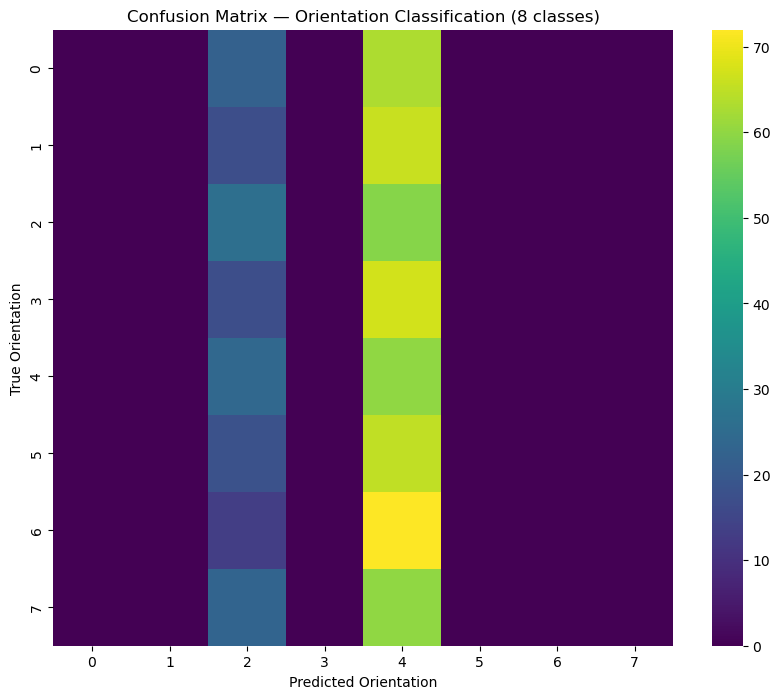

In [33]:
# ------------------------------------------------
# Plot Confusion Matrix for Orientation Classification
# ------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, cmap="viridis", annot=False)
plt.title("Confusion Matrix — Orientation Classification (8 classes)")
plt.xlabel("Predicted Orientation")
plt.ylabel("True Orientation")
plt.show()



### Models for regression _(if applicable)_
_(What models will you be using for regression? Why did you choose to use them? What questions would you answer with them? How would you evaluate if each model? What cross-validation method did you use?)_

In [ ]:
# you may add some code here to show how the model works in principle

### Other methods used _(if applicable)_

_(If this is a preprocessing step to prepare your data for regression or classification models, you should put this subsection before your explanation for the regression or classification models.)_

_(What method did you use otherwise? Why did you choose to use them? What questions would you answer with them? How would you evaluate the results? What cross-validation method did you use when applicable?)_

In [14]:
# ------------------------------------------------
# Model 2 — PCA + SVM for Orientation Classification
# Full spike-train features (first 200 ms)
# ------------------------------------------------

# Build feature matrix X_200: (n_trials × 200 time bins)
X_200 = example_file[time_cols_0_200].values

print("Raw feature matrix shape (full spike train):", X_200.shape)
print("Example row (first 20 time bins):")
print(X_200[0, :20])

# Labels: orientation (same as before)
y = y_orientation.copy()

print("\nLabels shape:", y.shape)
print("Unique classes:", np.unique(y))
print("Number of orientation classes:", len(np.unique(y)))

Raw feature matrix shape (full spike train): (2685, 200)
Example row (first 20 time bins):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Labels shape: (2685,)
Unique classes: [0 1 2 3 4 5 6 7]
Number of orientation classes: 8


In [15]:
# ------------------------------------------------
# Train/Test Split and Feature Scaling (PCA + SVM Model)
# ------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split (25% test set)
X_train_200, X_test_200, y_train_200, y_test_200 = train_test_split(
    X_200, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train_200.shape)
print("Test set shape:", X_test_200.shape)

# Standardize features — FIT ONLY ON TRAINING
scaler_200 = StandardScaler()
X_train_200_scaled = scaler_200.fit_transform(X_train_200)
X_test_200_scaled = scaler_200.transform(X_test_200)

print("\nAfter scaling:")
print("Train mean (should be ~0):", np.mean(X_train_200_scaled))
print("Train std  (should be ~1):", np.std(X_train_200_scaled))


Training set shape: (2013, 200)
Test set shape: (672, 200)

After scaling:
Train mean (should be ~0): -1.0412822009400375e-18
Train std  (should be ~1): 0.9823441352194274


Explained variance by first 10 PCs:
PC1: 0.0188  |  cumulative: 0.0188
PC2: 0.0139  |  cumulative: 0.0327
PC3: 0.0123  |  cumulative: 0.0450
PC4: 0.0121  |  cumulative: 0.0571
PC5: 0.0116  |  cumulative: 0.0687
PC6: 0.0114  |  cumulative: 0.0801
PC7: 0.0111  |  cumulative: 0.0912
PC8: 0.0104  |  cumulative: 0.1017
PC9: 0.0104  |  cumulative: 0.1120
PC10: 0.0100  |  cumulative: 0.1220


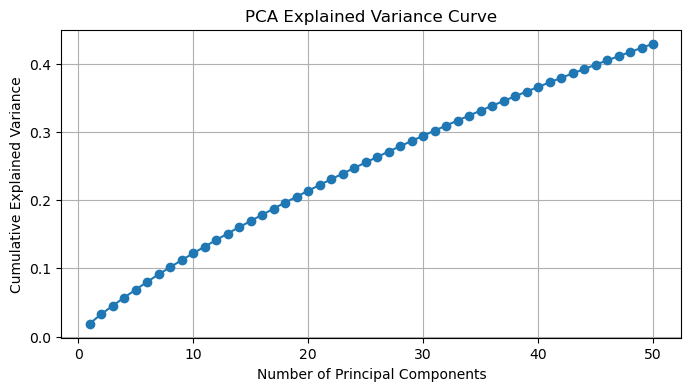

In [16]:
# ------------------------------------------------
# PCA on time-series spike features
# ------------------------------------------------

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Try large number of components initially (we will select later)
max_components = min(50, X_train_200_scaled.shape[1])  # up to 50 PCs or 200 dims

pca = PCA(n_components=max_components, random_state=42)
pca.fit(X_train_200_scaled)

explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print("Explained variance by first 10 PCs:")
for i in range(10):
    print(f"PC{i+1}: {explained[i]:.4f}  |  cumulative: {cum_explained[i]:.4f}")

# Plot cumulative variance
plt.figure(figsize=(8,4))
plt.plot(range(1, max_components+1), cum_explained, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance Curve")
plt.grid(True)
plt.show()


In [17]:
# ------------------------------------------------
# Cross-Validation to find best PCA dimension (number of components)
# ------------------------------------------------

from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

pca_dims = [10, 20, 30, 40, 50]
C_fixed = 1.0  # baseline C value

results_dim = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("Evaluating PCA dimensions:")
for n_comp in pca_dims:
    
    fold_accuracies = []
    
    # fit PCA with n_comp on training data
    pca_n = PCA(n_components=n_comp, random_state=42)
    X_train_pca = pca_n.fit_transform(X_train_200_scaled)
    
    # do 5-fold CV on the transformed train data
    for train_idx, val_idx in kf.split(X_train_pca):
        X_tr, X_val = X_train_pca[train_idx], X_train_pca[val_idx]
        y_tr, y_val = y_train_200[train_idx], y_train_200[val_idx]
        
        # train SVM classifier with RBF kernel
        svm = SVC(C=C_fixed, kernel='rbf')
        svm.fit(X_tr, y_tr)
        
        y_pred = svm.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        fold_accuracies.append(acc)
    
    mean_acc = np.mean(fold_accuracies)
    results_dim.append((n_comp, mean_acc))
    
    print(f"n_components = {n_comp}  -->  Mean CV Accuracy = {mean_acc:.4f}")

# pick best number of components
best_dim, best_dim_acc = max(results_dim, key=lambda x: x[1])
print("\nBest PCA dimension:", best_dim)
print("Best CV Accuracy:", best_dim_acc)


Evaluating PCA dimensions:
n_components = 10  -->  Mean CV Accuracy = 0.1287
n_components = 20  -->  Mean CV Accuracy = 0.1222
n_components = 30  -->  Mean CV Accuracy = 0.1222
n_components = 40  -->  Mean CV Accuracy = 0.1287
n_components = 50  -->  Mean CV Accuracy = 0.1277

Best PCA dimension: 40
Best CV Accuracy: 0.1286680740219498


In [18]:
# ------------------------------------------------
# K-fold CV to tune SVM C (using the best PCA dimension)
# ------------------------------------------------

C_values = [0.01, 0.1, 1, 10, 100]
results_C = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"Using PCA dimension: {best_dim} components")

for C in C_values:
    fold_accuracies = []
    
    # Fit PCA (40 components) on full training data
    pca_fixed = PCA(n_components=best_dim, random_state=42)
    X_train_pca = pca_fixed.fit_transform(X_train_200_scaled)
    
    # 5-fold CV for SVM with this C
    for train_idx, val_idx in kf.split(X_train_pca):
        X_tr, X_val = X_train_pca[train_idx], X_train_pca[val_idx]
        y_tr, y_val = y_train_200[train_idx], y_train_200[val_idx]
        
        # Train SVM
        svm = SVC(C=C, kernel='rbf', random_state=42)
        svm.fit(X_tr, y_tr)
        
        # Validation accuracy
        y_pred = svm.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        fold_accuracies.append(acc)
    
    mean_acc = np.mean(fold_accuracies)
    results_C.append((C, mean_acc))
    
    print(f"C = {C}  -->  Mean CV Accuracy = {mean_acc:.4f}")

# Choose best C
best_C, best_C_acc = max(results_C, key=lambda x: x[1])
print("\nBest SVM C value:", best_C)
print("Best CV Accuracy:", best_C_acc)


Using PCA dimension: 40 components
C = 0.01  -->  Mean CV Accuracy = 0.1038
C = 0.1  -->  Mean CV Accuracy = 0.1108
C = 1  -->  Mean CV Accuracy = 0.1287
C = 10  -->  Mean CV Accuracy = 0.1227
C = 100  -->  Mean CV Accuracy = 0.1316

Best SVM C value: 100
Best CV Accuracy: 0.1316346308161426


In [19]:
# ------------------------------------------------
# Train final PCA + SVM model using best parameters
# ------------------------------------------------

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# 1) Fit PCA on full training data (40 components)
final_pca = PCA(n_components=best_dim, random_state=42)
X_train_final = final_pca.fit_transform(X_train_200_scaled)
X_test_final = final_pca.transform(X_test_200_scaled)

# 2) Train SVM with best C value
final_svm = SVC(C=best_C, kernel='rbf', random_state=42)
final_svm.fit(X_train_final, y_train_200)

# 3) Test set predictions
y_test_pred = final_svm.predict(X_test_final)

# 4) Compute test accuracy
test_acc = accuracy_score(y_test_200, y_test_pred)
print("Final Test Accuracy:", test_acc)

# 5) Confusion matrix
cm = confusion_matrix(y_test_200, y_test_pred)
print("\nConfusion Matrix shape:", cm.shape)
print(cm)


Final Test Accuracy: 0.14583333333333334

Confusion Matrix shape: (8, 8)
[[ 7  2  7  1 66  0  0  2]
 [ 2  0  9  0 68  0  2  2]
 [ 2  1 11  0 62  2  2  5]
 [ 3  0  6  2 68  0  0  5]
 [ 3  1  8  0 65  1  1  5]
 [ 1  0  8  0 68  1  2  3]
 [ 3  2  2  1 73  2  2  0]
 [ 0  1  7  1 61  2  1 10]]


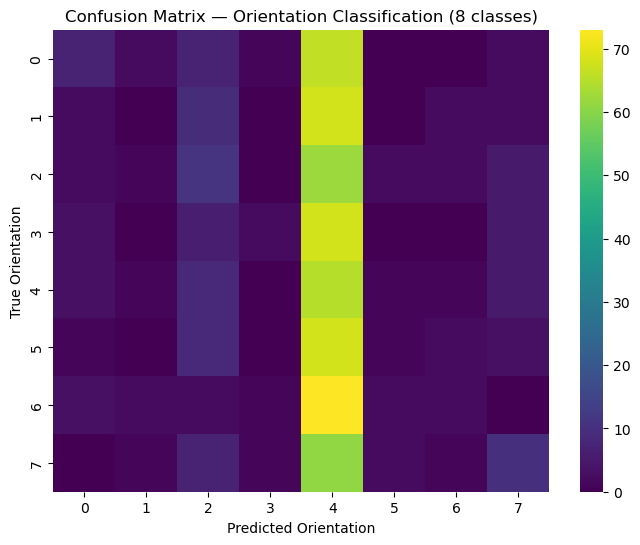

In [20]:
# ------------------------------------------------
# Plot Confusion Matrix — Orientation Classification
# ------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='viridis', annot=False)
plt.title("Confusion Matrix — Orientation Classification (8 classes)")
plt.xlabel("Predicted Orientation")
plt.ylabel("True Orientation")
plt.show()

# you may add some code here to show how the model works in principle

## Results

_(What did you find when you carried out your methods? Some of your code related to
presenting results/figures/data may be replicated from the methods section or may only be present in
this section. All of the plots that you plan on using for your presentation should be present in this
section)_

### classification results
_(What are you trying to do here?)_

In [ ]:
# how did you do it

_(How do you interpret what you see?)_

_(What are you doing next?)_

In [ ]:
# how did you do it (etc. etc.)

### regression results
_(What are you trying to do here?)_

In [ ]:
# how did you do it

_(How do you interpret what you see?)_

_(What are you doing next?)_

In [ ]:
# how did you do it (etc. etc.)

### other results
_(What are you trying to do here?)_

In [ ]:
# how did you do it

_(How do you interpret what you see?)_

_(What are you doing next?)_

In [ ]:
# how did you do it (etc. etc.)

## Discussion and Conclusion

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

### discussion on the classification results

### discussion on the regression results

### discussion on the other results

### conclusion and future steps

## Author contribution

_(Please describe the contribution of each member of group)._

## References

_(List the source(s) for any data and/or literature cited in your project.  Ideally, this should be formatted using a formal citation format (MLA or APA or other, your choice!).   Multiple free online citation generators are available such as <a href="http://www.easybib.com/style">http://www.easybib.com/style</a>. **Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_